# Test Nexus Comparison
1.3.2023

Recently I developed Alignment Fraction (AF), Disagreement Fraction (DF), and began delving into moments of inertia to characterize differences in drought evolution between metrics in `explore/drought_event_comparison.ipynb`. Here I will use simple geometries to test whether these computations are performing as expected.

## Desired Characterizations

- how similar/different are drought event ...
    - extent
    - total covered area
    - location
- how far does a drought "move and spread" over the course of its lifetime? how does that compare to other metrics?

The first large bullet I am attributing to being handled by AF and DF. However, they have no bearing on how the drought has changed from initial development to recovery, which is where I think moments of inertia could be useful.

Let's compose some test scenarios:
- two metrics completely match (AF=1 and DF=0)
- two metrics never match (AF=0, DF=1)
    - parallel track evolution (movements are the same, starting location different)
    - mirrored track evolution (opposite movements about common axis)
    - repulsion evolution (moving directly away from each other)
    - attractive with external repulsion evolution (moving towards each other, but something between them keeps them apart, (i.e. a mountain range?))
- two metrics overlap at some point in time, but not all time (0 <= AF, DF <= 1)
    - convergence (end up overlapping and staying overlapping)
        - mutual approach (both events head towards each other at same rate)
        - asymmetric approach (one event heads toward the other while the other remains stationary)
    - divergence (start overlapping and end up not overlapping)
        - mirrored
        - asymmetrical (each event follows completely different paths)
    - mixed
        - passing (events pass straight through each other, overlap maybe coincidental)
        - dispersion (events converge then have offshoots diverging but have part staying converged)

All of these should have growth (increased drought area), shrink (decreased drought area), and static (unchanged drought area) evolutions.

In [27]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

import xarray as xr
import pandas as pd

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot
import ndrought.drought_network as dnet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
n = np.array([0, 0, 0, 0, 0])
a = np.array([1, 0, 0, 0, 0])
b = np.array([0, 1, 0, 0, 0])
c = np.array([0, 0, 1, 0, 0])
d = np.array([0, 0, 0, 1, 0])
e = np.array([0, 0, 0, 0, 1])

### Complete Match

In [20]:
cm = [
    np.vstack([n, n, c, n, n]),
    np.vstack([n, n, d, n, n]),
    np.vstack([n, n, e, n, n]),
    np.vstack([n, n, d, n, n]),
    np.vstack([n, n, c, n, n]),
    np.vstack([n, n, b, n, n]),
    np.vstack([n, n, a, n, n])
]


Double check real quick I'm setting these up right

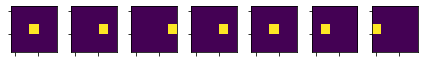

In [21]:
fig, axs = plt.subplots(1, 7)

for ax, ar in zip(axs.ravel(), cm):
    ax.imshow(ar)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

plt.tight_layout()

In [44]:
dnet.create_EventNodes(cm[0])

([time: 0, id: 0], 1)

### Parallel Track

In [23]:
pt_1 = [
    np.vstack([n, n, n, b, n]),
    np.vstack([n, n, b, n, n]),
    np.vstack([n, b, n, n, n])
]

pt_2 = [
    np.vstack([n, n, n, d, n]),
    np.vstack([n, n, d, n, n]),
    np.vstack([n, d, n, n, n])
]